<a href="https://colab.research.google.com/github/my9oso6gqm/my9oso6gqm.github.io/blob/main/varie/temp/trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Recupero dati da Binance

In [2]:
!pip install binance-connector

In [3]:
from binance.spot import Spot as Client
import pandas as pd

In [4]:
## Recupero dalle Api di Binance i dati di Cardano
spot_client = Client(base_url="https://api.binance.com")
data = spot_client.klines("ADAUSDT", "1m", limit=100)

In [5]:
## Converto la risposta delle Api in un Dataframe di Pandas
df = pd.DataFrame(data)

In [6]:
## Stampo il Dataframe
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1652806320000,0.57060000,0.57140000,0.57060000,0.57100000,41065.70000000,1652806379999,23447.39136000,106,25537.90000000,14580.51608000,0
1,1652806380000,0.57120000,0.57170000,0.57100000,0.57170000,56789.60000000,1652806439999,32453.13161000,122,33451.80000000,19115.93583000,0
2,1652806440000,0.57180000,0.57180000,0.57130000,0.57140000,43432.60000000,1652806499999,24821.82794000,106,10743.20000000,6140.23308000,0
3,1652806500000,0.57150000,0.57150000,0.57060000,0.57070000,108353.80000000,1652806559999,61855.48481000,211,56923.80000000,32499.33546000,0
4,1652806560000,0.57070000,0.57190000,0.57050000,0.57130000,137728.20000000,1652806619999,78682.18655000,283,99736.60000000,56986.63169000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1652812020000,0.55740000,0.55780000,0.55660000,0.55680000,116473.10000000,1652812079999,64910.28743000,238,59387.00000000,33099.51290000,0
96,1652812080000,0.55690000,0.55740000,0.55610000,0.55630000,213698.20000000,1652812139999,118969.49273000,366,128422.20000000,71494.05609000,0
97,1652812140000,0.55630000,0.55660000,0.55440000,0.55500000,259635.00000000,1652812199999,144284.60301000,458,131011.70000000,72823.26274000,0
98,1652812200000,0.55500000,0.55700000,0.55420000,0.55530000,201037.80000000,1652812259999,111729.66997000,430,94068.70000000,52283.79095000,0


In [7]:
## Converto il Timestamp in Datatime
df[0] = (pd.to_datetime(df[0],unit='ms'))

In [8]:
## Elimino le colonne che non uso
df = df.drop(columns=[6, 7, 8, 9, 10, 11])

In [9]:
## Do dei nomi alle colonne
df.columns = ['date', 'open', 'high', 'low', 'close', 'volume']

In [11]:
## Grafico chiusure di Cardano

In [12]:
import matplotlib.pyplot as plt

In [13]:
## Converto il formato della colonna Close
df["close"] = df["close"].astype(float)

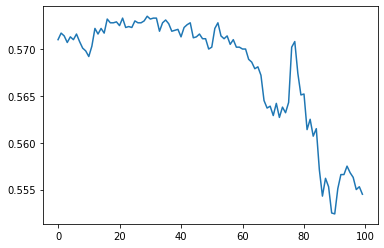

In [14]:
## Grafico la colonna Close
df["close"].plot()

In [ ]:
## SMA

$$SMA = \frac{\sum_{i=1}^{N}Pi}{N}$$

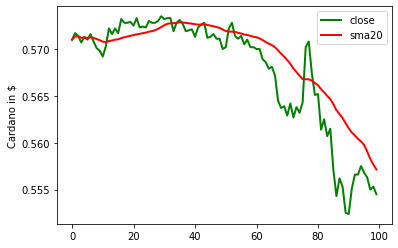

In [15]:
import statistics as stats

time_period = 20
history = []
sma_values = []

for close_price in df["close"]:
  history.append(close_price)
  if len(history) > time_period:
    del (history[0])

  sma_values.append(stats.mean(history))

df = df.assign(sma20=pd.Series(sma_values))

close_price = df['close']

sma = df['sma20']

import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Cardano in $')

close_price.plot(ax=ax1, color='g', lw=2., legend=True)

sma.plot(ax=ax1, color='r', lw=2., legend=True)

plt.show()

